#### Name Dipika Sharma
#### DSC 640 T301 Data Presentation and Visualization
#### Week 5 & 6

## Excercise 3.2 Tree maps, Area charts, and Stacked area charts

In [1]:
## Importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Lets load the data

expend_df = pd.read_csv("expenditures.txt", sep = '\t', header=0)

In [3]:
## Let see how the data looks

expend_df.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [4]:
## Lets create a new field to show the total expenditure by categories.

Total_expend_cat = expend_df.groupby(['category'])['expenditure'].sum().reset_index()

## Lets create another field to show total expenditure by year

Total_expend_year = expend_df.groupby(['year'])['expenditure'].sum().reset_index()

### Tree Map

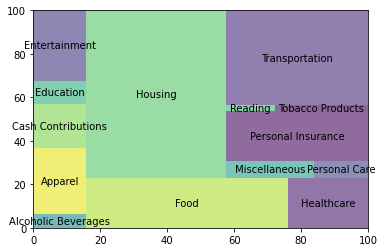

In [5]:
## Lets build the Tree map

squarify.plot(sizes=Total_expend_cat['expenditure'], label=Total_expend_cat['category'], alpha=0.6) 
plt.axis('on') 
plt.show() 

### Area Chart

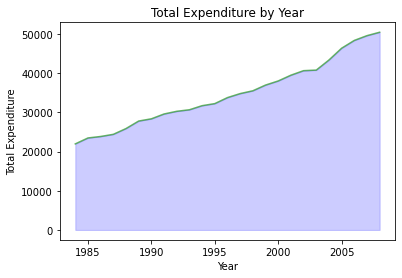

In [6]:
## Lets build Area chart to show total expenditure by Years.

plt.fill_between( Total_expend_year['year'], Total_expend_year['expenditure'], color='blue', alpha=0.2)
plt.title('Total Expenditure by Year')
plt.xlabel('Year')
plt.ylabel('Total Expenditure')
plt.plot(Total_expend_year['year'], Total_expend_year['expenditure'], color='green', alpha=0.6)

### Stacked Area Chart

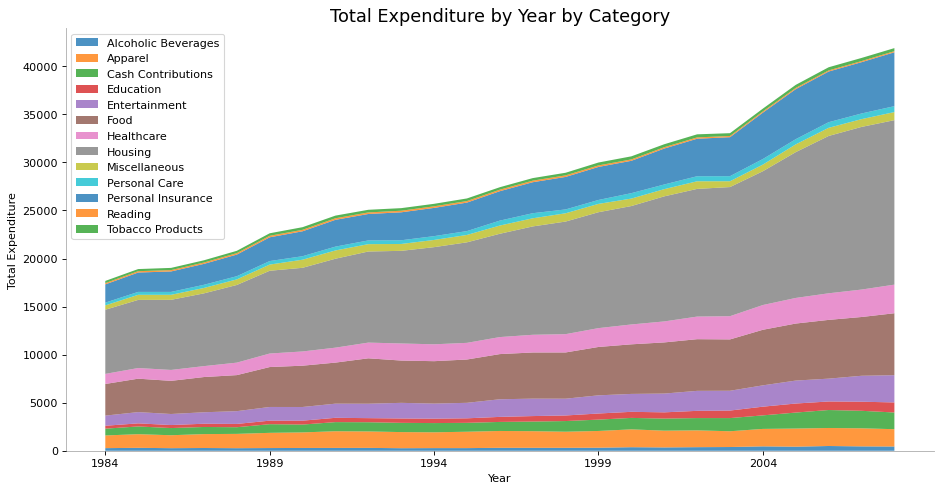

In [7]:
## Creating a new dataframe with index.
df = expend_df.loc[:, expend_df.columns != 'sex'].pivot(index='year', columns='category', values='expenditure')
df.reset_index(level=0, inplace=True)

## Let define the plot and annotate
fig, ax = plt.subplots(1,1,figsize=(14, 7), dpi= 80)
columns = df.columns[1:]
labs = df.values.tolist()

## Preparing the data
x  = df['year'].values.tolist()
y0 = df[columns[0]].values.tolist()
y1 = df[columns[1]].values.tolist()
y2 = df[columns[2]].values.tolist()
y3 = df[columns[3]].values.tolist()
y4 = df[columns[4]].values.tolist()
y5 = df[columns[5]].values.tolist()
y6 = df[columns[6]].values.tolist()
y7 = df[columns[7]].values.tolist()
y8 = df[columns[8]].values.tolist()
y9 = df[columns[9]].values.tolist()
y10 = df[columns[10]].values.tolist()
y11 = df[columns[11]].values.tolist()
y12 = df[columns[12]].values.tolist()

y = np.vstack([y0, y1, y2, y3, y4, y5, y6, y7, y8, y9, y10, y11, y12])

## Assign each columns for plot

labs = columns.values.tolist()
ax = plt.gca()
ax.stackplot(x, y, labels=labs, alpha=0.8)

## Lets assign the title to the plot

ax.set_title('Total Expenditure by Year by Category', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Expenditure')

## Lets set the legend

ax.legend(fontsize=10, ncol=1, loc = 'upper left')
plt.xticks(x[::5], fontsize=10, horizontalalignment='center')

## Lets lighten borders
plt.gca().spines["top"].set_alpha(0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(0)
plt.gca().spines["left"].set_alpha(.3)

## Display the graph
plt.show()